In [208]:
import pandas as pd
import numpy as np
from matplotlib import pyplot  as plt
import seaborn as sns
from itertools import product

In [209]:
df_da1 = pd.read_csv("../data/data_assignment_1.csv")
df_da1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   LocationIdentifier  2880 non-null   object
 1   Date                2880 non-null   object
 2   Hour                2880 non-null   int64 
 3   Quarter             2880 non-null   int64 
 4   vehicleCount        2880 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 112.6+ KB


In [210]:
df_da1.Date = pd.to_datetime(df_da1.Date, infer_datetime_format=True)
# df_da1.Date = pd.to_datetime(df_da1.Date, format='%m-%d-%Y')
df_da1.describe()

,Hour,Quarter,vehicleCount
count,2880.000000,2880.000000,2880.000000
mean,11.500000,22.500000,200.527431
std,6.923389,16.773422,150.648716
min,0.000000,0.000000,2.000000
25%,5.750000,11.250000,54.000000
50%,11.500000,22.500000,209.000000
75%,17.250000,33.750000,307.000000
max,23.000000,45.000000,611.000000


In [211]:
ser_day_of_week= pd.DatetimeIndex(df_da1['Date']).day_name().str[:3]

In [212]:
df_da1.insert(df_da1.columns.get_loc('vehicleCount'), 'Day', ser_day_of_week)
df_da1["Date"] +=  pd.to_timedelta(df_da1.Hour, unit='h') + pd.to_timedelta(df_da1.Quarter, unit="m")
df_da1 = df_da1.drop(["Hour", "Quarter"], axis=1)
df_da1 = df_da1.set_index('Date')

In [213]:
df_da1.head(3)

,LocationIdentifier,Day,vehicleCount
Date,,,
2021-11-22 00:00:00,GE001_279DUNG_D1,Mon,23
2021-11-22 00:15:00,GE001_279DUNG_D1,Mon,13
2021-11-22 00:30:00,GE001_279DUNG_D1,Mon,8


In [214]:
df_da1.LocationIdentifier.unique()

array(['GE001_279DUNG_D1', 'GE001_279DUNG_D2', 'GEO01_279BERL_D2',
       'GEO01_279BERL_D1', 'GEO01_279MIDD_D1', 'GEO01_279MIDD_D2'],
      dtype=object)

In [215]:
def plot_locations(start: str, end: str, df):
    sensors = df["LocationIdentifier"].unique().tolist()
    sensors.sort()
    sns.set(rc={"figure.figsize":(18, 20)})
    fig, axes = plt.subplots(nrows=3, ncols=2)
    grid_points = np.array(list(product(range(3),range(2))))
    for i, sensor in enumerate(sensors):
        df.query('LocationIdentifier == @sensor and Date >=  @day_start and Date < @day_end')\
            .plot(ax=axes[grid_points[i][0],grid_points[i][1]], title=sensor)
    return None

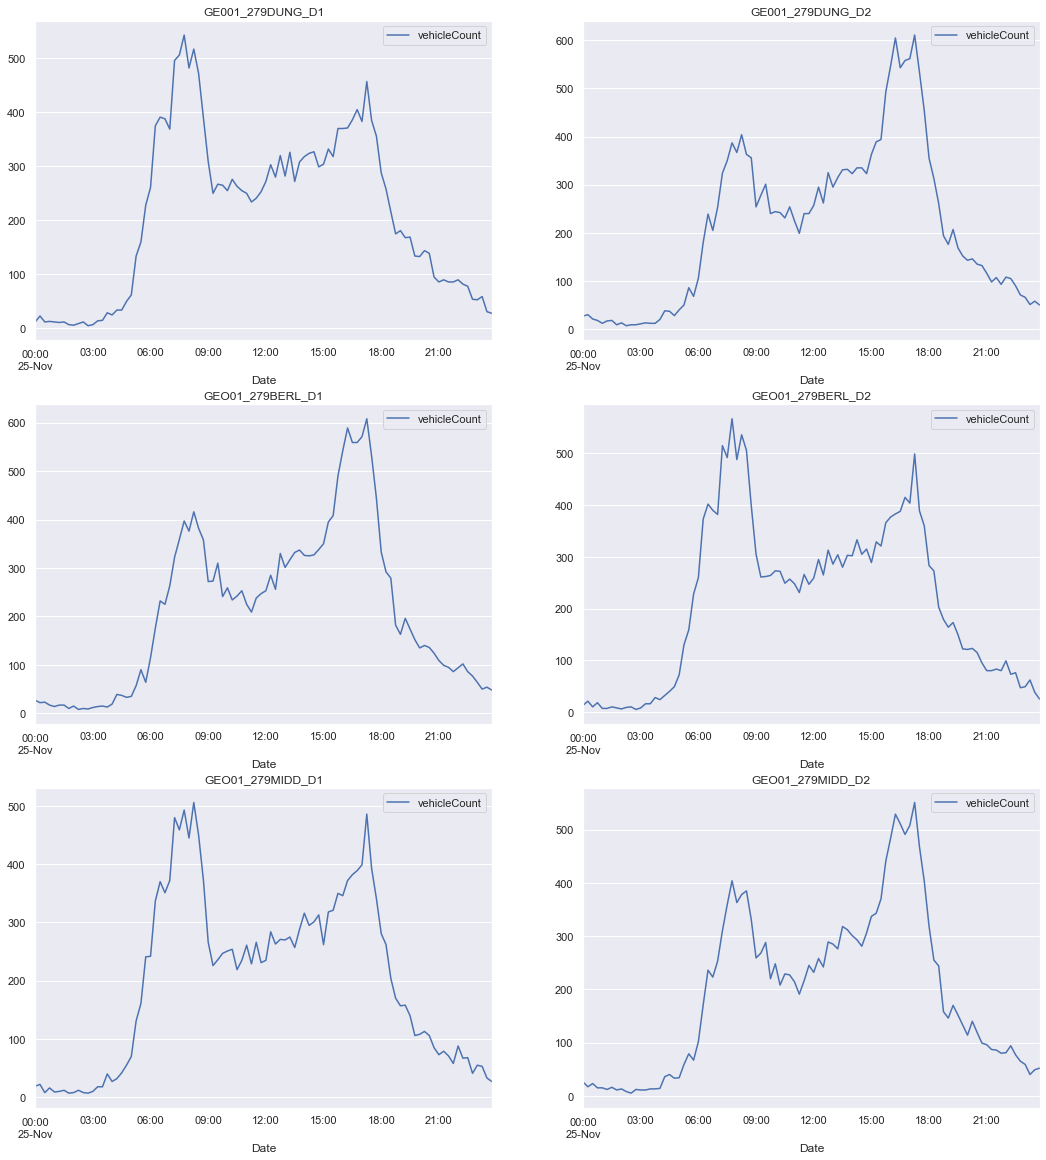

In [216]:
day_start = "2021-11-25"
day_end = "2021-11-26"
plot_locations(day_start, day_end, df_da1)

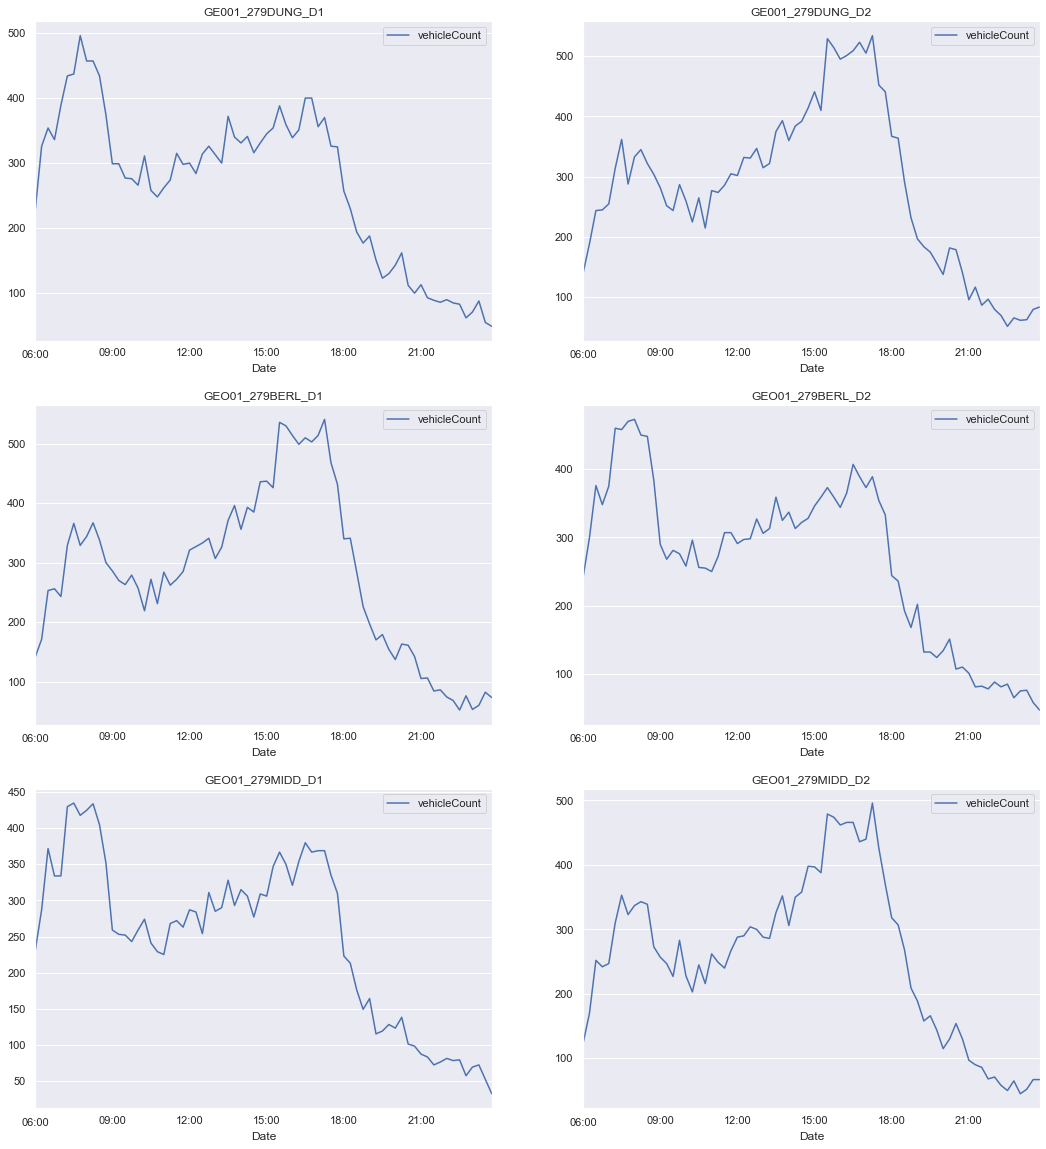

In [217]:
day_start = "2021-11-26 06:00"
day_end = "2021-11-27 19:00"
plot_locations(day_start, day_end, df_da1)

In [218]:
df_da2 = pd.read_csv("../data/data_assignment_2_v3.csv")

In [219]:
df_da2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29068 entries, 0 to 29067
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ldsId          29068 non-null  int64
 1   passageTime    29068 non-null  int64
 2   passagetimeMs  29068 non-null  int64
 3   loopPairId     29068 non-null  int64
 4   startLoop      29068 non-null  int64
 5   endLoop        29068 non-null  int64
 6   vehicleLength  29068 non-null  int64
 7   vehicleSpeed   29068 non-null  int64
dtypes: int64(8)
memory usage: 1.8 MB


In [220]:
type(df_da2.passageTime[0])

numpy.int64

In [221]:
df_da2["ldsId"].nunique()

1

In [222]:
df_da2 = df_da2.drop(["ldsId","startLoop", "endLoop"], axis = 1 )

In [223]:
df_da2["loopPairId"].nunique()

3

In [224]:
df_da2["loopPairId"].value_counts().sort_values(ascending=False)

2    15395
3     6994
1     6679
Name: loopPairId, dtype: int64

In [225]:
df_da2.passageTime = pd.to_datetime(df_da2.passageTime, unit = 's')

In [226]:
df_da2['passageTime'] = df_da2['passageTime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

In [227]:
df_da2 = df_da2.set_index('passageTime')
df_da2.sample(10)

,passagetimeMs,loopPairId,vehicleLength,vehicleSpeed
passageTime,,,,
2022-01-25 08:32:42+01:00,394,2,195,98
2022-01-25 11:12:43+01:00,935,3,494,88
2022-01-25 15:31:50+01:00,871,2,417,103
2022-01-25 11:13:29+01:00,65,2,460,101
2022-01-25 18:22:43+01:00,194,2,475,103
2022-01-25 18:32:40+01:00,357,1,384,117
2022-01-25 09:01:13+01:00,109,3,449,102
2022-01-25 14:05:43+01:00,124,2,457,103
2022-01-25 11:57:53+01:00,439,1,304,105


In [228]:
df_da2.head(3)

,passagetimeMs,loopPairId,vehicleLength,vehicleSpeed
passageTime,,,,
2022-01-25 00:00:29+01:00,743,3,408,127
2022-01-25 00:00:38+01:00,770,2,358,107
2022-01-25 00:00:41+01:00,861,3,368,93


In [229]:
df_da2.groupby("loopPairId")["vehicleSpeed"].agg(["min", "max", "mean","median"]).transpose()



loopPairId,1,2,3
min,70.000000,0.000000,19.000000
max,211.000000,201.000000,199.000000
mean,114.085642,102.190971,97.085931
median,112.000000,101.000000,96.000000


In [230]:
# check  O speed  loopPairID 2 !
# no traffic jam
zero_speed = ( df_da2["vehicleSpeed"] == 0 ) & (df_da2["loopPairId"] == 2)
df_da2[zero_speed]

,passagetimeMs,loopPairId,vehicleLength,vehicleSpeed
passageTime,,,,
2022-01-25 15:29:00+01:00,121,2,450,0


In [231]:
df_da2.loc['2022-01-24 19:00':'2022-01-25 06:00'].groupby("loopPairId")["vehicleSpeed"].agg(["min", "max", "mean","median"]).transpose()

loopPairId,1,2,3
min,87.000000,75.000000,62.000000
max,182.000000,201.000000,160.000000
mean,123.765766,110.103393,100.234421
median,124.000000,109.000000,100.000000


In [232]:
df_da2.groupby("loopPairId").size().transpose()

loopPairId
1     6679
2    15395
3     6994
dtype: int64

In [233]:
df_da2.loc['2022-01-25 06:00':'2022-01-25 19:00'].groupby("loopPairId").size().transpose()

loopPairId
1     6191
2    13164
3     5968
dtype: int64

In [234]:
df_da2["category"] = pd.cut(x=df_da2["vehicleLength"], bins= [0, 240, 560, 1150, 1220, 2500],labels = ["Cat.1", "Cat.2", "Cat.3", "Cat.4", "Cat.5"])


In [235]:
df_da2.category.value_counts().sort_values(ascending=False)

Cat.2    25606
Cat.3     1898
Cat.5      807
Cat.1      702
Cat.4       54
Name: category, dtype: int64

In [236]:
df_da2.loc['2022-01-25 06:00':'2022-01-25 19:00']

,passagetimeMs,loopPairId,vehicleLength,vehicleSpeed,category
passageTime,,,,,
2022-01-25 06:00:02+01:00,832,2,399,99,Cat.2
2022-01-25 06:00:06+01:00,472,2,336,110,Cat.2
2022-01-25 06:00:07+01:00,0,2,347,96,Cat.2
2022-01-25 06:00:30+01:00,331,3,452,88,Cat.2
2022-01-25 06:00:32+01:00,609,2,439,133,Cat.2
...,...,...,...,...,...
2022-01-25 19:00:42+01:00,946,3,471,130,Cat.2
2022-01-25 19:00:48+01:00,364,2,329,104,Cat.2
2022-01-25 19:00:51+01:00,371,2,404,107,Cat.2


In [237]:
df_da2.groupby("category").size().transpose()

category
Cat.1      702
Cat.2    25606
Cat.3     1898
Cat.4       54
Cat.5      807
dtype: int64

<AxesSubplot:title={'center':'Distribution of vehicle categories'}, xlabel='category'>

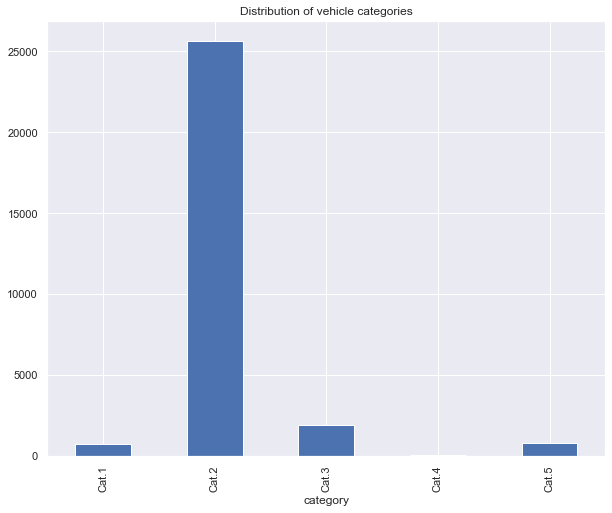

In [238]:
sns.set(rc={"figure.figsize":(10, 8)})
df_da2.pivot_table(columns='category',aggfunc='size').plot(kind='bar', title="Distribution of vehicle categories")

In [239]:
# df_da2[df_da2["category"] == "Cat.2"].loc['2022-01-25 06:00':'2022-01-25 06:10'].plot(y="vehicleSpeed")

In [240]:
sns.set(rc={"figure.figsize":(10, 8)})

<AxesSubplot:xlabel='passageTime'>

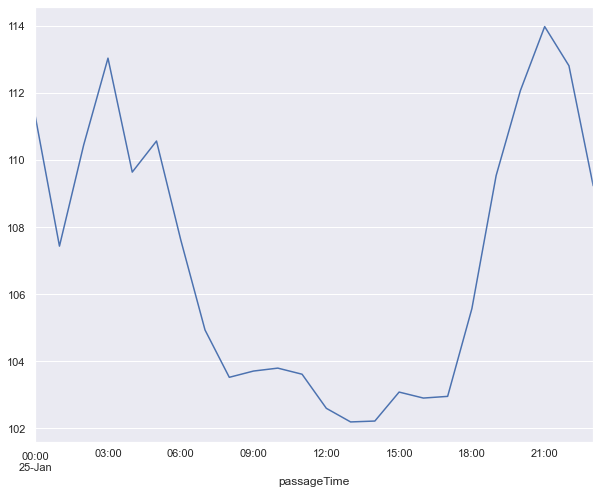

In [241]:
hourly_cat2 = df_da2[df_da2["category"] == "Cat.2"].resample('H').mean()
hourly_cat2.vehicleSpeed.plot()

<AxesSubplot:xlabel='passageTime'>

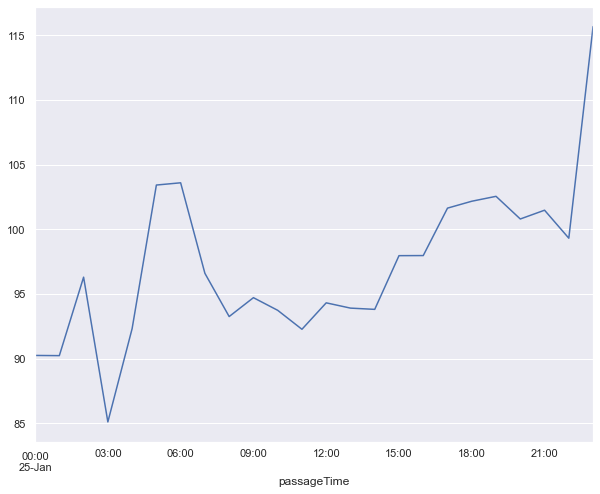

In [242]:
hourly_other = df_da2[df_da2["category"]  != "Cat.2"].resample('H').mean()
hourly_other.vehicleSpeed.plot()

In [243]:
# sns.set(rc={"figure.figsize":(15, 15)})
# hourly_all_cat = df_da2.groupby("category").resample('12H').mean()
# hourly_all_cat.vehicleSpeed.plot.barh(y="category")

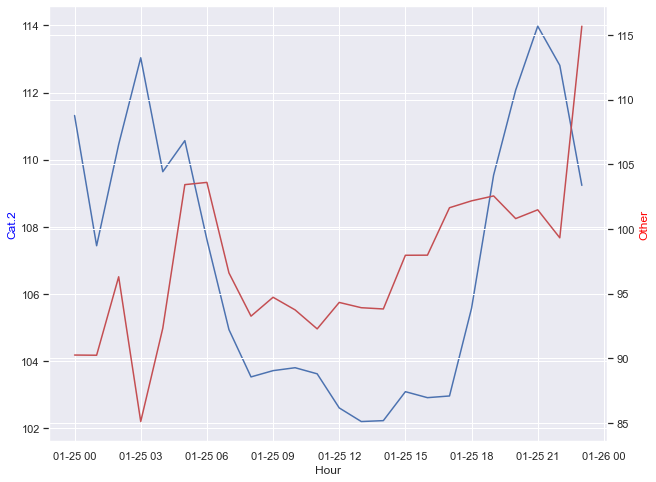

In [244]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(hourly_cat2.index, hourly_cat2['vehicleSpeed'], 'b-')
ax2.plot(hourly_other.index, hourly_other['vehicleSpeed'], 'r-')

ax1.set_xlabel('Hour')
ax1.set_ylabel('Cat.2', color='blue')
ax2.set_ylabel('Other', color='red')

plt.show()
plt.rcParams['figure.figsize'] = 20,10

In [245]:
# df_da2.index.strftime("%H:%m:%S")
sns.set(rc={"figure.figsize":(18, 10)})

<AxesSubplot:title={'center':'vehicle count per category'}, ylabel='passageTime'>

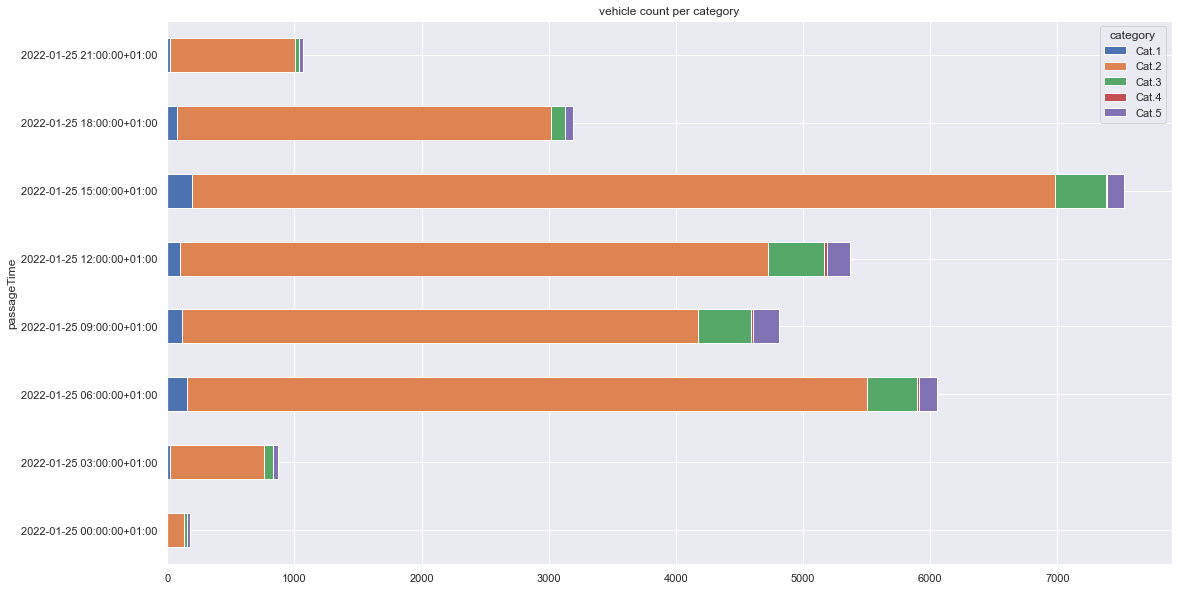

In [246]:
df_da2.groupby(["category"])["vehicleLength"].resample('3H').count().unstack().transpose().plot.barh(stacked = True, title="vehicle count per category")

In [247]:
df_categories_perLD = df_da2.groupby(["loopPairId", "category"])["vehicleLength"].resample('3H').count()


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


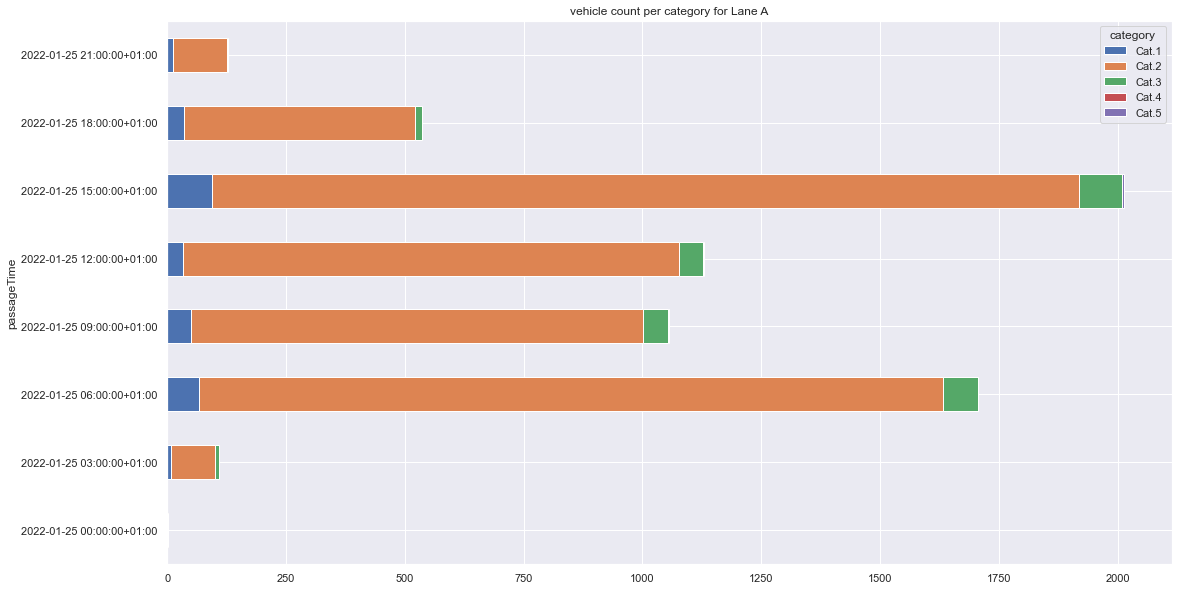

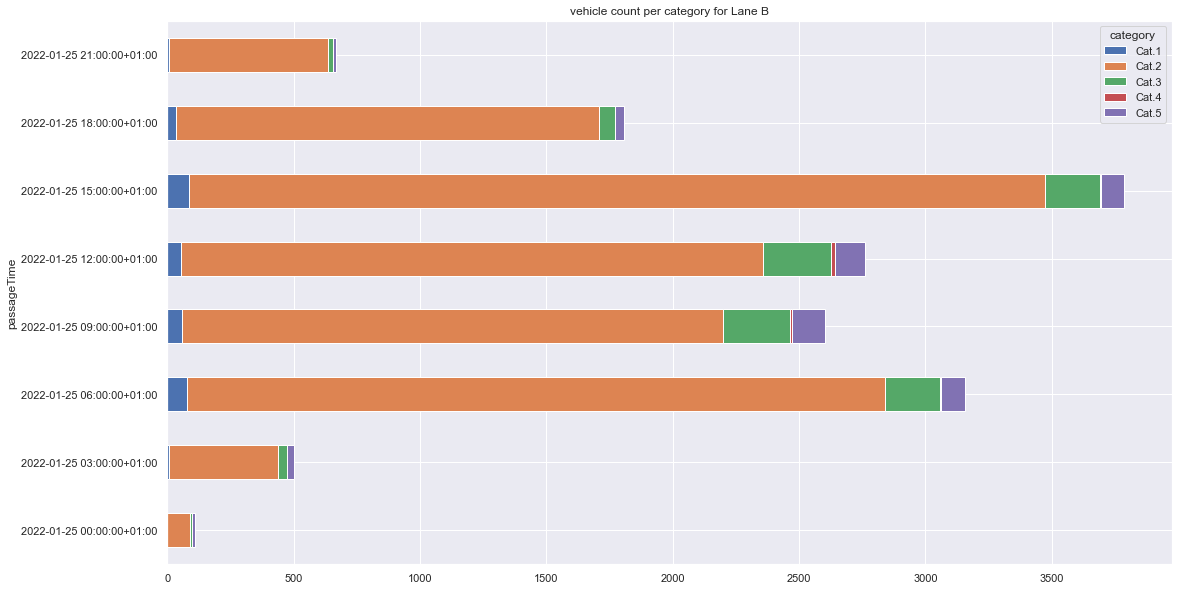

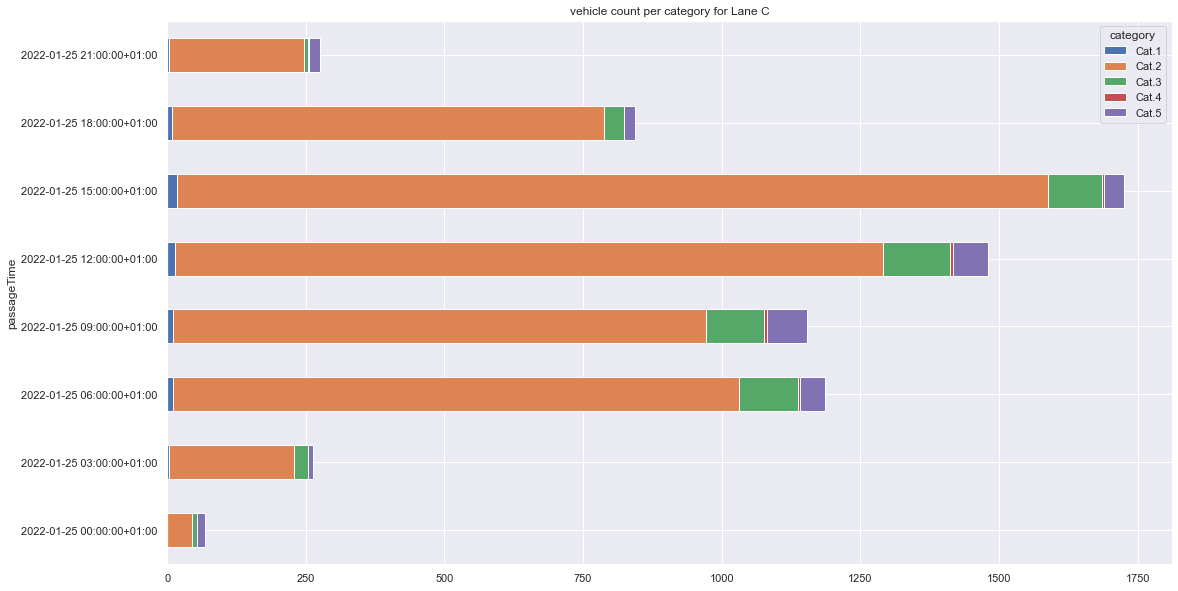

In [248]:
lanes = ("A", "B", "C")
for ld, lane in enumerate(lanes, 1):
    print(df_categories_perLD.loc[ld].unstack().transpose().plot.barh(stacked = True, title=f"vehicle count per category for Lane {lane}"))

